# Description of the project

You have decided to open a small cafe in Moscow. It is original - guests should be served by robots. The project is promising, but expensive. Together with your partners, you decided to approach investors. They are interested in the current state of affairs on the market - can you gain popularity for a long time, when all the onlookers have seen enough of the robot waiters?
You are an analytics guru and your partners ask you to prepare a market study. You have open data about public catering establishments in Moscow.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from pymystem3 import Mystem
from io import BytesIO
import requests
m = Mystem()

In [2]:
# Info
rest_data = pd.read_csv('rest_data.csv', index_col=0)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 840.3+ KB


In [3]:
# First  5 rows
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
# Describe
rest_data.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [5]:
# Number of duplicates
rest_data.duplicated().sum()

0

In [6]:
# Numbers of empty
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [7]:
rest_data[rest_data['address'].duplicated(keep=False)]

,id,object_name,chain,object_type,address,number
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [8]:
rest_data.loc[(rest_data.chain == 'да'), 'chain'] = 'Сетевое'
rest_data.loc[(rest_data.chain == 'нет'), 'chain'] = 'Несетевое'
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,Несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,Несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,Несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,Сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,Несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,Сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,Сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36


The dataset has 6 columns with 15366 observations. These columns contain information about the names of objects, their identifiers, network/non-network point status, type of object, address and number of seats. In the network status column, the value was changed from “yes” to “network” and from “no” to “non-network”, as this will allow us to build more informative graphs in the future and for visual perception of information in the table. The table contains duplicates by address, but they cannot be removed from the table, since a selective analysis was carried out using external sources - it was found that these are mainly canteens in universities located in the same academic building.

In [9]:
# I am exploring the ratio of types of public catering facilities by quantity. I'll make a graph.
object_type_pivot_table = rest_data.groupby(by='object_type').count().reset_index()
object_type_pivot_table.drop(object_type_pivot_table.columns[[1, 2, 3, 4]], axis = 1, inplace = True)
object_type_pivot_table.reset_index()
object_type_pivot_table.columns = ['object_type', 'number_of_object']
object_type_pivot_table

,object_type,number_of_object
0,бар,856
1,буфет,585
2,закусочная,360
3,кафе,6099
4,кафетерий,398
5,магазин (отдел кулинарии),273
6,предприятие быстрого обслуживания,1923
7,ресторан,2285
8,столовая,2587


In [10]:
object_type_pivot_table['number_of_object'].sum()

15366

In [11]:
object_type_pivot_table['ratio'] = round(object_type_pivot_table['number_of_object'] / object_type_pivot_table['number_of_object'].sum() * 100, 2)
object_type_pivot_table = object_type_pivot_table.sort_values(by='ratio', ascending=False)
object_type_pivot_table

,object_type,number_of_object,ratio
3,кафе,6099,39.69
8,столовая,2587,16.84
7,ресторан,2285,14.87
6,предприятие быстрого обслуживания,1923,12.51
0,бар,856,5.57
1,буфет,585,3.81
4,кафетерий,398,2.59
2,закусочная,360,2.34
5,магазин (отдел кулинарии),273,1.78


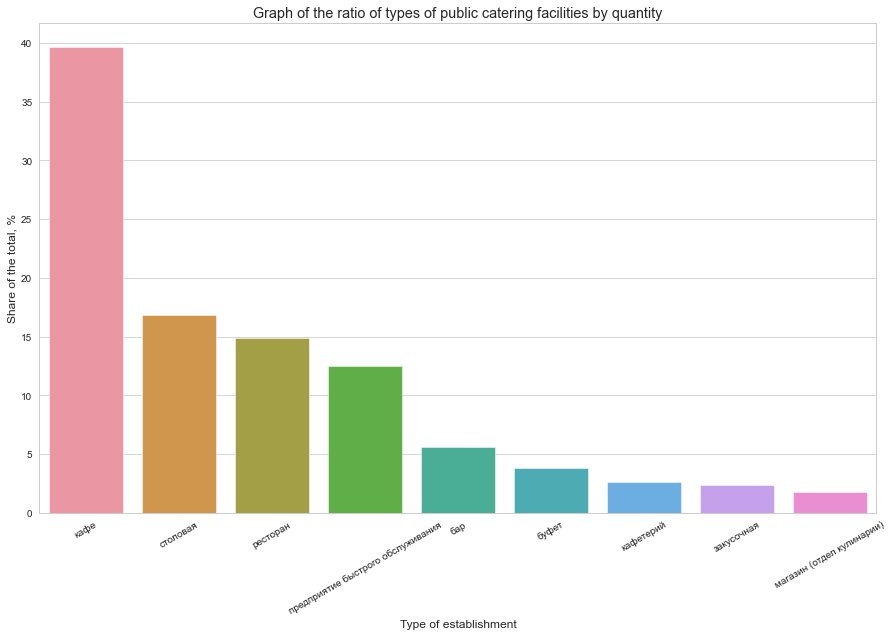

In [12]:

plt.style.use('ggplot')
plt.figure(figsize=(15, 9))
sns.set_style("whitegrid")
plt.xticks(rotation=30)
ax = sns.barplot(x='object_type', y='ratio', data=object_type_pivot_table)
ax.set_title('Graph of the ratio of types of public catering facilities by quantity')
ax.set_xlabel('Type of establishment')
ax.set_ylabel('Share of the total, %')
# ax.xticks(rotation=45)
plt.show()

The most popular types of food establishments are cafes, canteens and restaurants, which occupy 39.7%, 16.85% and 14.87%, respectively, of the total number of establishments in the set. The smallest share is occupied by shops (culinary department) and eateries, which occupy less than 2.5%.

In [13]:
### I am researching the ratio of chain and non-chain establishments by quantity. I'll build a graph
chain_pivot_table = rest_data.groupby(by='chain').count().reset_index()
chain_pivot_table.drop(chain_pivot_table.columns[[2, 3, 4, 5]], axis = 1, inplace = True)
chain_pivot_table.reset_index()
chain_pivot_table.columns = ['chain', 'number_of_object']
chain_pivot_table

,chain,number_of_object
0,Несетевое,12398
1,Сетевое,2968


In [14]:
chain_pivot_table['ratio'] = round(chain_pivot_table['number_of_object'] / chain_pivot_table['number_of_object'].sum() * 100, 2)
chain_pivot_table

,chain,number_of_object,ratio
0,Несетевое,12398,80.68
1,Сетевое,2968,19.32


In [15]:
fig = (go
       .Figure(
           data=[go.Pie(
               labels=chain_pivot_table['chain'], 
               values=chain_pivot_table['ratio'],  
               textinfo='label+percent')]
       )
      )

fig.update(layout_title_text='The ratio of chain and non-chain establishments')
fig.show()

The number of chain and non-chain establishments was distributed in the ratio of 19.3% for chain establishments, versus 80.7% for non-chain establishments. The Pareto principle has practically been preserved.

In [16]:
chain_object_pivot_table = rest_data.groupby(by=['object_type', 'chain']).count().reset_index()
chain_object_pivot_table.drop(chain_object_pivot_table.columns[[3, 4, 5]], axis = 1, inplace = True)
chain_object_pivot_table.columns = ['object_type', 'chain', 'number_of_object']
chain_object_pivot_table

pd.options.mode.chained_assignment = None

In [17]:
chain_ratio = chain_object_pivot_table.query('chain == "Сетевое"')
chain_sum = chain_object_pivot_table['number_of_object'].sum()
chain_ratio['ratio'] = round(chain_ratio['number_of_object'] / chain_sum * 100, 2)
chain_ratio

,object_type,chain,number_of_object,ratio
1,бар,Сетевое,37,0.24
3,буфет,Сетевое,11,0.07
5,закусочная,Сетевое,56,0.36
7,кафе,Сетевое,1396,9.08
9,кафетерий,Сетевое,52,0.34
11,магазин (отдел кулинарии),Сетевое,78,0.51
13,предприятие быстрого обслуживания,Сетевое,791,5.15
15,ресторан,Сетевое,544,3.54
17,столовая,Сетевое,3,0.02


In [18]:
fig = px.bar(chain_object_pivot_table, x='object_type', y='number_of_object', color='chain', 
             labels={
                     "object_type": "Object type",
                     "number_of_object": "Number of objects, pcs"
                 },
             title='Network distribution depending on object type')
fig.update_xaxes(tickangle=45)
fig.show()

Chain establishments are mainly characteristic of 3 types of public catering establishments - cafes, fast food establishments and restaurants. Chain establishments in the cafe category occupy 9% of the total number of establishments, restaurants occupy 3.5%, and fast food establishments 5.15%.
These categories include the most popular restaurant chains. For example, "Chocolate Girl", "Starbucks", etc.

In [19]:
chain_rest = rest_data.query('chain == "Сетевое"')
chain_rest

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,Сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,Сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,Сетевое,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,Сетевое,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,Сетевое,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,Шоколадница,Сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,Сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [20]:
chain = chain_rest.groupby(['object_name']).agg({'number':'mean', 'object_name' : 'count'})
chain.columns = ['mean_number', 'number_of_object']
chain_above_1 = chain.query('number_of_object > 1')
chain_above_1

,mean_number,number_of_object
object_name,,
Bocconcino,66.666667,3
Burger Club,20.333333,3
COFIX,10.666667,3
Coffeeshop Company,47.250000,4
Cofix,9.454545,22
...,...,...
Шоколадница,56.170213,141
Штолле,31.416667,12
ЯКИТОРИЯ,185.600000,5


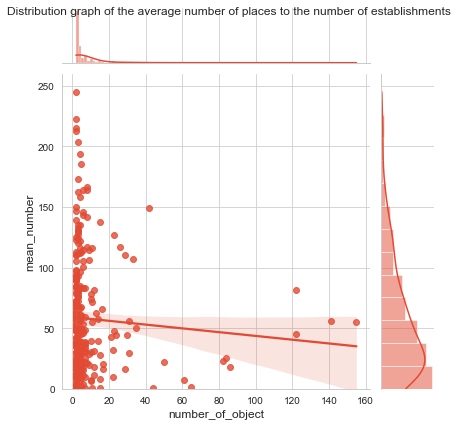

In [21]:
p = sns.jointplot(x='number_of_object', y='mean_number', data=chain_above_1, kind='reg', ylim=(0, 260))
p.fig.suptitle("Distribution graph of the average number of places to the number of establishments")
plt.show()

Based on the graph, we can conclude that establishments are characterized by a small number of establishments with a large number of seats.

In [22]:
number = rest_data.groupby(['object_type']).agg({'number':'mean'}).sort_values(by='number',ascending=False).reset_index()
number['number'] = round(number['number'], 2)
number

,object_type,number
0,столовая,130.25
1,ресторан,96.83
2,буфет,51.13
3,бар,43.49
4,кафе,39.72
5,предприятие быстрого обслуживания,20.55
6,кафетерий,9.12
7,закусочная,7.61
8,магазин (отдел кулинарии),5.59


In [23]:
fig = px.bar(number, 
            y='number',
            x='object_type',
            labels={
                     "number": "Average number of seats, pcs.",
                     "object_type": "Object type"
                 },
             title='Average number of seats in different types of establishments')
fig.show()

The largest number of seats are provided by canteens and restaurants, which have more than 90 seats, respectively. This can be explained by the fact that canteens are usually located in places where large numbers of people are concentrated (universities, colleges, factories, etc.). Restaurants generally also have a large number of seats. The cafe that interests us has an average capacity of about 40 seats.

In [24]:
list = (['город Московский','поселение "Мосрентген"','поселение Московский','поселение Михайлово-Ярцевское',
        'поселение Марушкинское','город Троицк','поселение Сосенское', 'город Зеленоград'])
def get_street(row):
    if row['address'].split(",")[0].strip() == 'город Москва' and row['address'].split(",")[1].strip() not in list:
        return row['address'].split(",")[1].strip()
    elif row['address'].split(",")[1].strip() in list:
        return row['address'].split(",")[2].strip()
    else:
        return row['address'].split(",")[0].strip()
rest_data['street'] = rest_data.apply(get_street,axis=1)
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,Несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,Несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,Несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,Сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,Несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,Сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,Сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [25]:
top10_location = rest_data.groupby(['street']).agg({'object_name':'count'}).sort_values(by='object_name',ascending=False).reset_index().head(10)
top10_location.columns = ['street', 'number_of_object']
top10_location

,street,number_of_object
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,162
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


In [26]:
fig = px.bar(top10_location, 
            y='number_of_object',
            x='street',
            labels={
                     "number_of_object": "Number of objects located on the street",
                     "street": "Street name"
                 },
             title='Top 10 streets by number of objects')
fig.show()

In [27]:
spreadsheet_id = '1uaz1BBc05j4ob_BQ8bOc0DupOgf_Ggibu2498sdyvFI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_street = pd.read_csv(BytesIO(r.content))
data_street.to_csv('data_street.csv')
data_street.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [28]:
data_street.rename(columns={'streetname':'street'}, inplace=True)
data_street['street'] = data_street['street'].str.strip()
data_street.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [29]:
top10_area = top10_location.merge(data_street, how='left')
top10_area = top10_area.groupby('street').agg({'area':lambda x: ', '.join(x)}).reset_index()
top10_area.style.set_caption('Top 10 streets by Moscow districts')

,street,area
0,Варшавское шоссе,"Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово"
1,Каширское шоссе,"Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное"
2,Кировоградская улица,"Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное"
3,Кутузовский проспект,"Район Дорогомилово, Район Фили-Давыдково"
4,Ленинградский проспект,"Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол"
5,Ленинский проспект,"Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка"
6,Пресненская набережная,Пресненский район
7,Профсоюзная улица,"Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан"
8,проспект Вернадского,"Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район"
9,проспект Мира,"Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район"


The most “populated” streets in Moscow were Prospect Mira, Profsoyuznaya Street and Leningradsky Prospekt - 204, 183 and 173 establishments, respectively. These streets are known as districts in the center of Moscow, although they are located throughout several districts.

In [30]:
count = rest_data.groupby(['street']).agg({'object_name':'count'}).sort_values(by='object_name',ascending=False).reset_index()
count.columns = ['street', 'number_of_object']
location_1 = count.query('number_of_object == 1')
location_1.head()

,street,number_of_object
1379,улица Фонвизина,1
1380,1-й Тушинский проезд,1
1381,Большой Строченовский переулок,1
1382,1-й Вешняковский проезд,1
1383,1-й проезд Марьиной Рощи,1


In [31]:
location_1_area = location_1.merge(data_street, how='left')
location_1_area.dropna(subset=['area'], inplace=True)
location_1_area = location_1_area.groupby('street').agg({'area':lambda x: ','.join(x)}).reset_index()
location_1_area = location_1_area.groupby('area').agg({'street' : 'count'}).sort_values(by='street', ascending=False).head(10)
location_1_area.style.set_caption('Names of districts with number of establishments 1')

,street
area,
Таганский район,25
Басманный район,23
Район Хамовники,22
Тверской район,19
Район Марьина роща,16
Район Сокольники,15
Пресненский район,15
Мещанский район,12
Район Замоскворечье,12


There are about 500 streets with one food establishment in the data set. At a time when they are located both in the center of Moscow and on the outskirts (for example, Altufyevo, Yuzhnoye Butovo, etc.)

In [32]:
top10 = top10_location['street']
top10_number = rest_data.query('street in @top10')
top10_number

,id,object_name,chain,object_type,address,number,street
151,155973,Кафе «Андерсон»,Сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,Кафе «Subway»,Сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,Кафе «Ламаджо»,Несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,Шаурма в пите,Несетевое,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,Выпечка,Несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,ДОДО пицца,Сетевое,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,198436,Милти,Сетевое,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15347,222491,Кальянная «Мята Lounge»,Сетевое,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15350,213061,Мята,Сетевое,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


In [33]:
fig = px.box(top10_number, 
             x='street', 
             y='number', 
             title='Distribution of seats for streets with a large number of objects')
fig.update_layout(xaxis_title='Top 10 streets by number of objects',
                 yaxis_title='Number of seats')
fig.data[0].marker.line.color = 'green'
fig.show()

Among the top 10 streets in terms of the number of objects, Kutuzovsky Avenue stands out, since it has outliers in establishments with 1,700 and 1,200 seats. Such meanings exist only in the dining room of the Cathedral of Christ the Savior.

# Summary

Based on the results of the study, we can conclude:
1) The largest number of establishments corresponds to the type of cafe, there are 6099 such establishments, which corresponds to 39.69% of the total number. 
2) The largest share of chain establishments is also suitable for this type of establishment - 9%.
3) The distribution graph shows that a large number of establishments correspond to a small number of places.
4) The largest number of seats on average belongs to canteens - more than 130 seats.
5) The largest number of establishments are located on Mira Avenue - more than 200 establishments.
As part of the project, it is worth noting that a robotic cafe should be opened in the center of Moscow, in particular on Profsoyuznaya Street in the Academichesky district. Here are some arguments:
1) this street is in the top 10 most “busy” for establishments, that is, there is a lot of traffic there, which can play into the hands of an attempt to stand out and make a specific cafe with robots;
2) This area is located near Moscow State University, the main and one of the largest universities in Moscow and Russia, which means young students should appreciate the new product;
3) On average, establishments on this street have 24 seats, which means you can spend less money on renting or purchasing premises, while robots will significantly speed up the work of the cafe.